## Assigment 3 deteksi penyakit stroke

### Nama : Ayub Bahrudin
Kelas: SI6-03

#### Import

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### Data loading

In [ ]:
nama_file = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(nama_file)

In [ ]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### EDA

In [ ]:
# Menampilkan statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.09

In [ ]:
# Memeriksa missing values
print("\nJumlah missing values tiap kolom:")
print(df.isnull().sum())


Jumlah missing values tiap kolom:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Handle missing values pada fitur 'bmi' dengan nilai rata-rata
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

# Cek kembali jumlah missing values
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


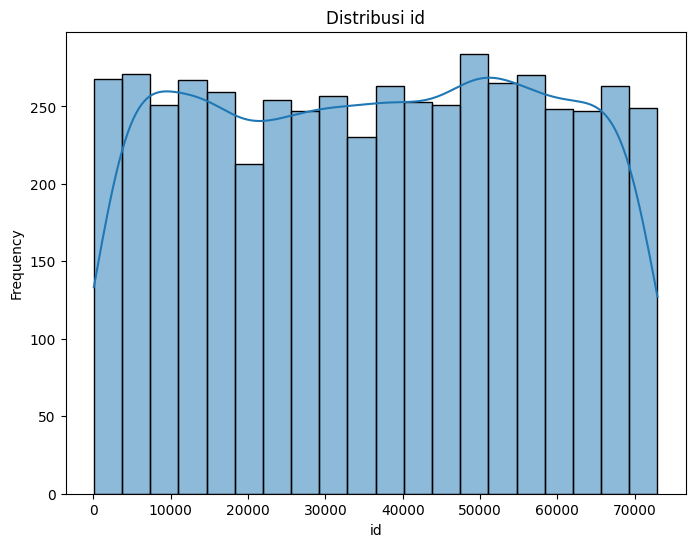

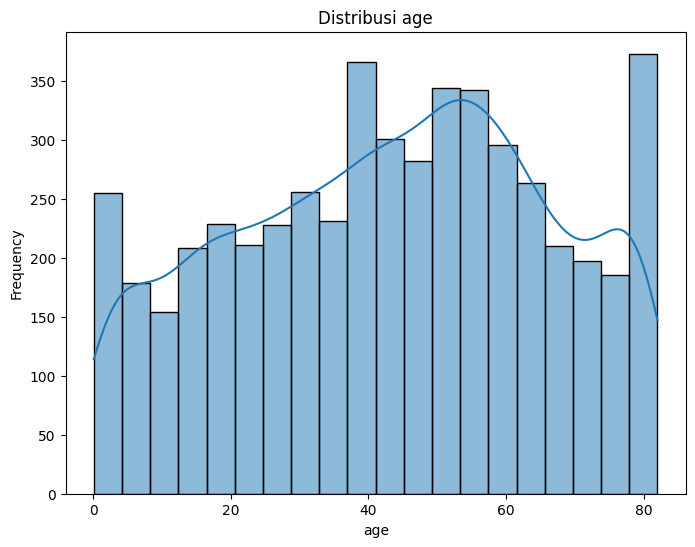

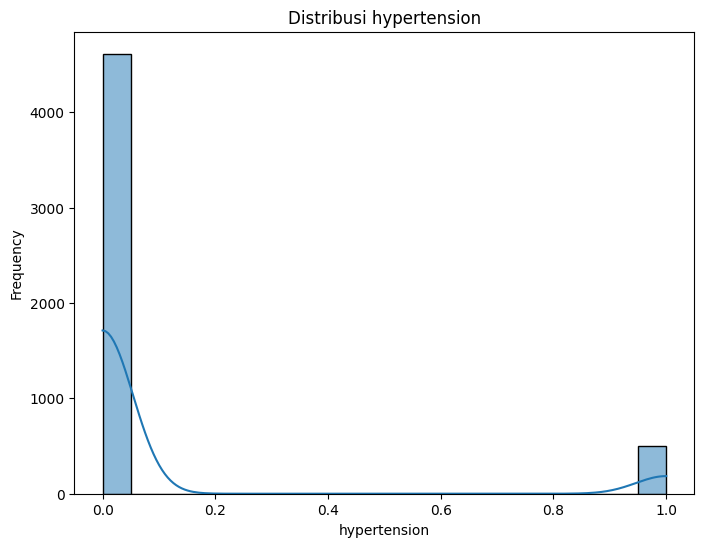

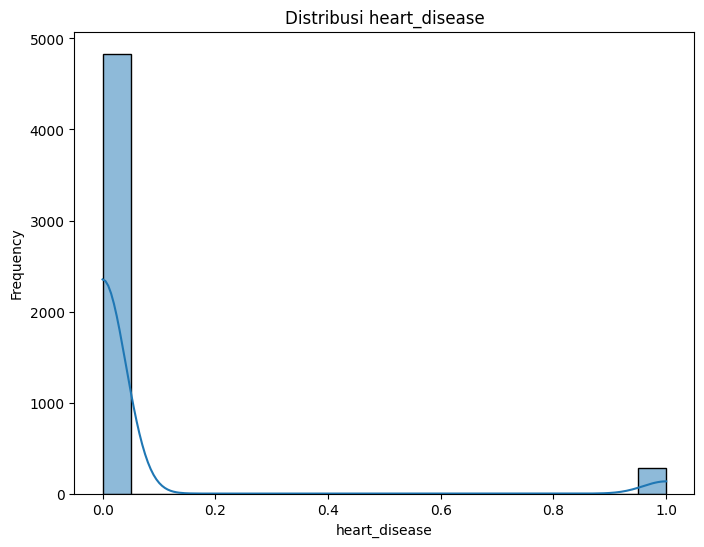

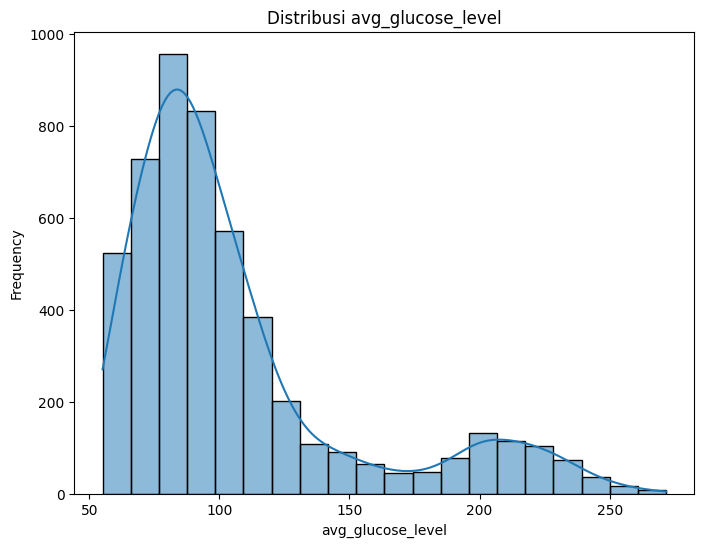

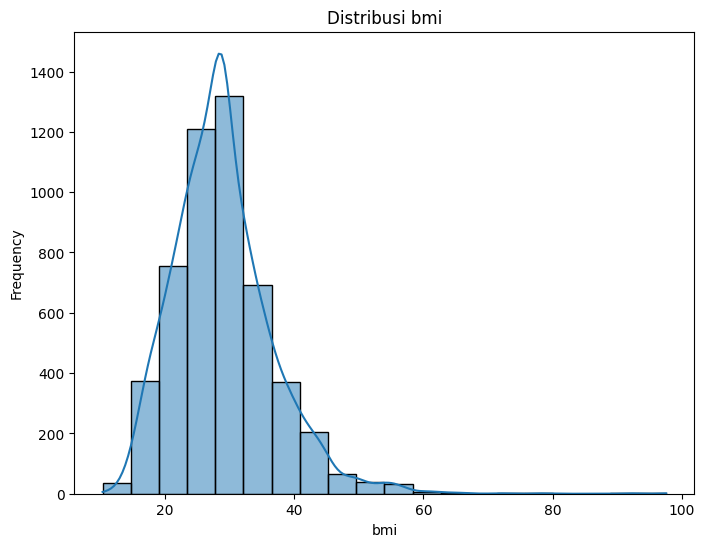

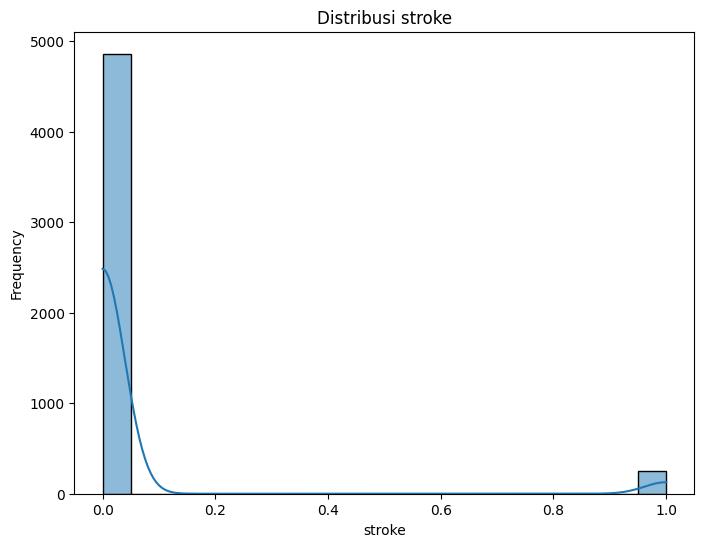

In [ ]:
# Melakukan visualisasi distribusi data untuk kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

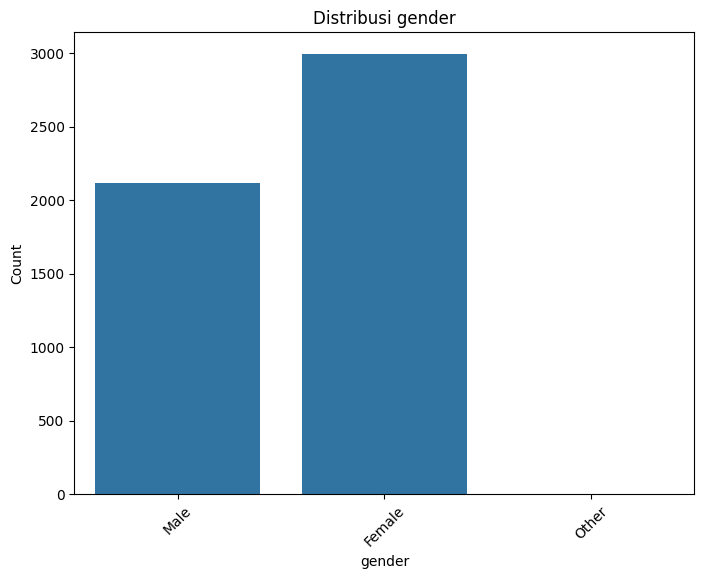

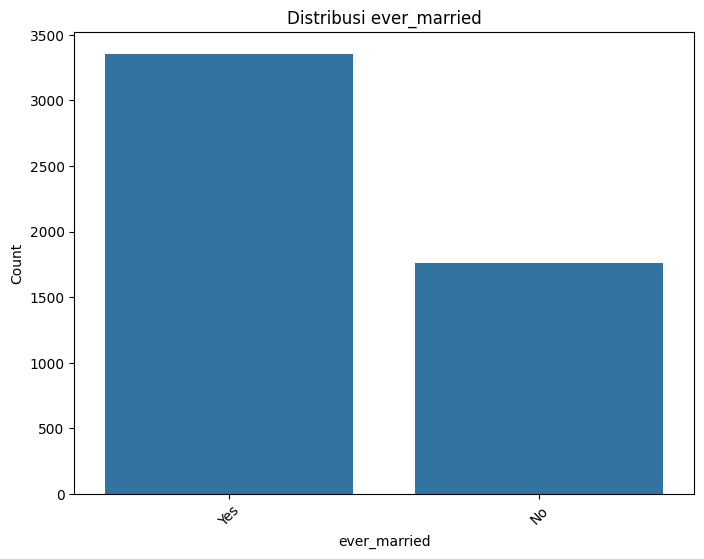

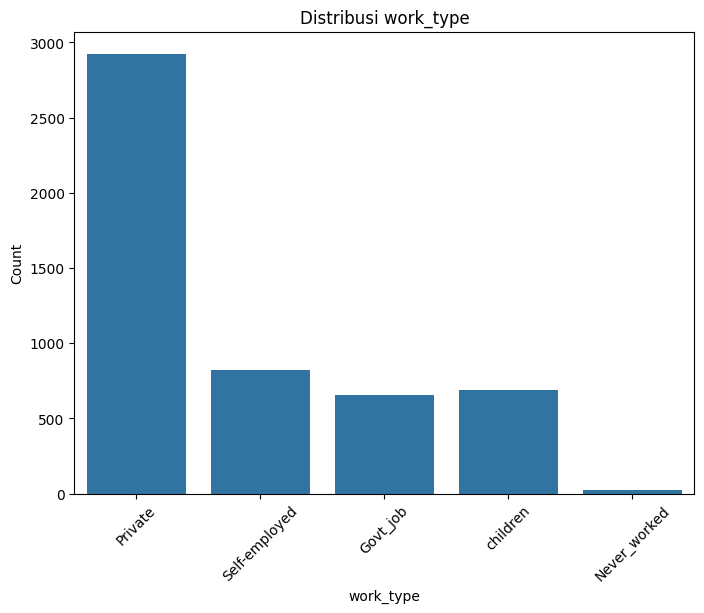

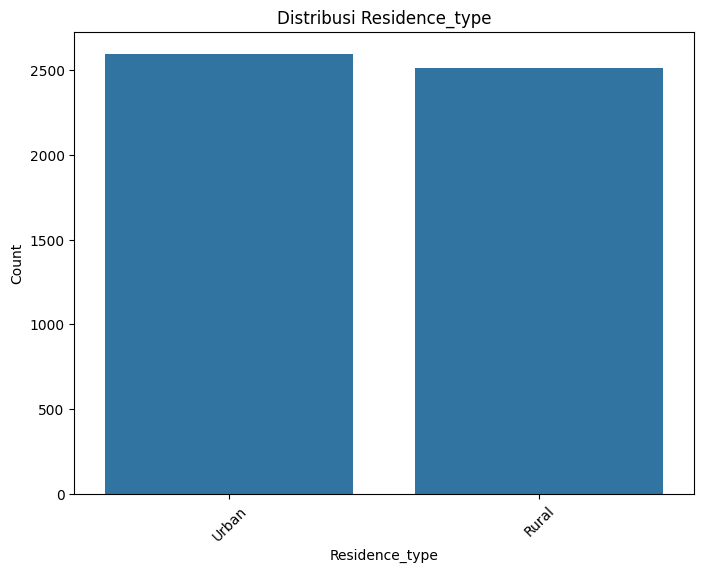

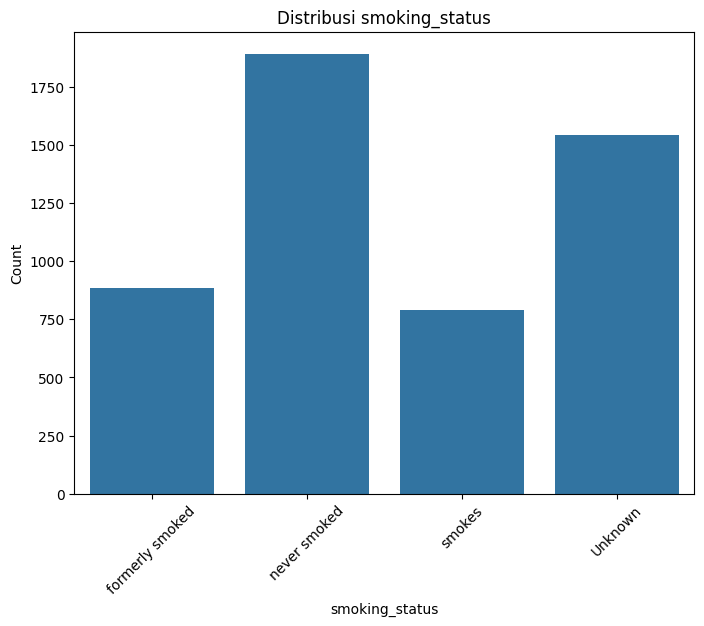

In [ ]:
# Melakukan visualisasi distribusi data untuk kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

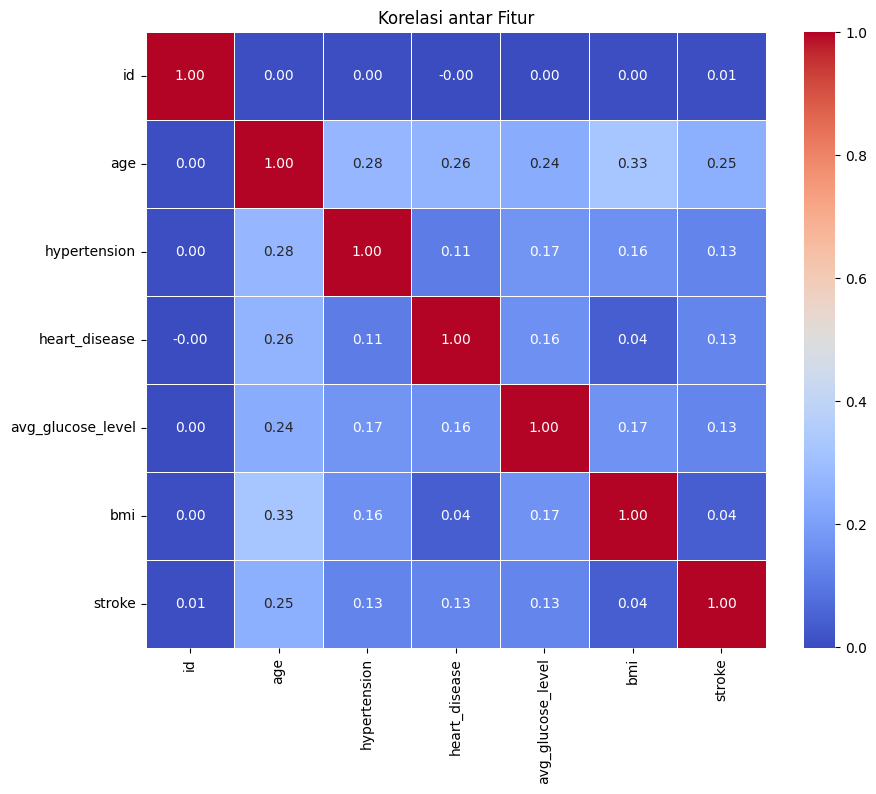

In [ ]:

# Menghapus kolom non-numerik
numeric_df = df.select_dtypes(include=np.number)

# Memeriksa korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antar Fitur')
plt.show()

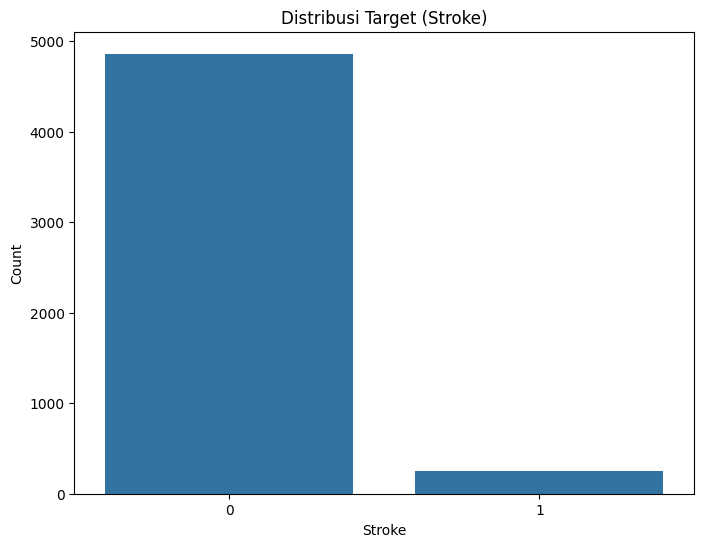

In [ ]:
# Menampilkan distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stroke')
plt.title('Distribusi Target (Stroke)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

#### Data processing

In [ ]:
# Handling categorical variables
# One-hot encoding untuk kolom 'gender', 'ever_married', 'work_type', 'Residence_type', dan 'smoking_status'
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [ ]:
# Drop kolom 'id' karena tidak relevan untuk pemrosesan model
df.drop('id', axis=1, inplace=True)

In [ ]:
# Split features dan target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:
# Split data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Menyimpan data yang sudah diproses ke dalam file CSV
processed_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
processed_df.to_csv('processed_data.csv', index=False)

#### Decision tree

In [ ]:
# Load dataset
df = pd.read_csv('processed_data.csv')

In [ ]:
# Split features dan target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:
# Inisialisasi model Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:

from sklearn.model_selection import train_test_split

# Split data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:

from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score


# Resampling data training menggunakan SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Inisialisasi model Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Definisikan grid untuk hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan GridSearchCV pada data yang sudah di-resample
grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan hyperparameters terbaik
print("Hyperparameters terbaik:", grid_search.best_params_)

# Memprediksi data testing
y_pred = grid_search.predict(X_test)

# Mencetak confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Mencetak classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Menghitung precision, recall, dan F1-score untuk kelas positif
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan precision, recall, dan F1-score untuk kelas positif
print("\nPrecision (kelas 1):", precision)
print("Recall (kelas 1):", recall)
print("F1-score (kelas 1):", f1)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi model Decision Tree setelah hypertuning dan resampling:", accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Hyperparameters terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Confusion Matrix:
[[795 177]
 [ 23  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.13      0.54      0.21        50

    accuracy                           0.80      1022
   macro avg       0.55      0.68      0.55      1022
weighted avg       0.93      0.80      0.86      1022


Precision (kelas 1): 0.1323529411764706
Recall (kelas 1): 0.54
F1-score (kelas 1): 0.2125984251968504

Akurasi model Decision Tree setelah hypertuning dan resampling: 0.8043052837573386


#### Random forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Definisikan grid untuk hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan GridSearchCV pada data yang sudah di-resample
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Menampilkan hyperparameters terbaik
print("Hyperparameters terbaik:", grid_search_rf.best_params_)

# Memprediksi data testing
y_pred_rf = grid_search_rf.predict(X_test)

# Mencetak confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Mencetak classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Menghitung precision, recall, dan F1-score untuk kelas positif
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Menampilkan precision, recall, dan F1-score untuk kelas positif
print("\nPrecision (kelas 1):", precision_rf)
print("Recall (kelas 1):", recall_rf)
print("F1-score (kelas 1):", f1_rf)

# Menghitung akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAkurasi model Random Forest setelah hypertuning dan resampling:", accuracy_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Hyperparameters terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[833 139]
 [ 24  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.16      0.52      0.24        50

    accuracy                           0.84      1022
   macro avg       0.56      0.69      0.58      1022
weighted avg       0.93      0.84      0.88      1022


Precision (kelas 1): 0.15757575757575756
Recall (kelas 1): 0.52
F1-score (kelas 1): 0.24186046511627904

Akurasi model Random Forest setelah hypertuning dan resampling: 0.8405088062622309


##### Meskipun perbedaannya tidak terlalu besar, model random forest memiliki F1-score yang sedikit lebih tinggi, yang menunjukkan kinerja yang sedikit lebih baik dalam memprediksi kasus stroke. Oleh karena itu, model random randomforest adalah yang lebih baik dari decisiontree hasil tersebut.